In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '../Work Sample/'
filename = 'forestfires.csv'
df = pd.read_csv(path+filename)
print(df.shape) #checking the shape of the dataset
print(len(df)) # checking if the full rows of the data was importeda

(517, 13)
517


In [4]:
pd.set_option('display.max_columns', 50)
df.describe(include = 'all')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000


In [31]:
Dependent = df[['area']]
Indendent = df[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC','ISI', 'temp', 'RH', 'wind', 'rain']]

In [32]:
Indendent = pd.get_dummies(Indendent)

In [59]:
print(Indendent)

[[ 1.00831277  0.56986043 -0.80595947 ... -0.36574845 -0.37587279
  -0.34151233]
 [ 1.00831277 -0.24400101 -0.00810203 ... -0.36574845  2.66047458
  -0.34151233]
 [ 1.00831277 -0.24400101 -0.00810203 ... -0.36574845 -0.37587279
  -0.34151233]
 ...
 [ 1.00831277 -0.24400101 -1.64008316 ... -0.36574845 -0.37587279
  -0.34151233]
 [-1.58736044 -0.24400101  0.68095666 ... -0.36574845 -0.37587279
  -0.34151233]
 [ 0.57570057 -1.05786246 -2.02087875 ... -0.36574845  2.66047458
  -0.34151233]]


In [33]:
scaler = StandardScaler().fit(Indendent)
Indendent = scaler.transform(Indendent)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(Indendent, Dependent, test_size=0.20, random_state=0)

### Linear Regression

In [35]:
LinReg = sm.OLS(Y_train,X_train)
Output = LinReg.fit()
print(Output.summary())

                                 OLS Regression Results                                
Dep. Variable:                   area   R-squared (uncentered):                   0.043
Model:                            OLS   Adj. R-squared (uncentered):             -0.024
Method:                 Least Squares   F-statistic:                             0.6353
Date:                Tue, 03 Dec 2019   Prob (F-statistic):                       0.923
Time:                        20:13:00   Log-Likelihood:                         -2156.2
No. Observations:                 413   AIC:                                      4366.
Df Residuals:                     386   BIC:                                      4475.
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### PCA

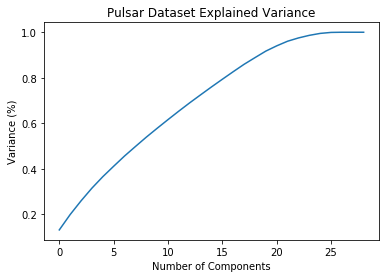

In [51]:
#Determine optimal number of pca components
pca = PCA().fit(Indendent)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [55]:
pca = PCA(n_components = 22)
principalComponents = pca.fit_transform(Indendent)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2', 'component 3', 'component 4', 'component 5', 'component 6', 'component 7', 
                          'component 8', 'component 9', 'component 10', 'component 11', 'component 12', 'component 13', 'component 14',
                         'component 15', 'component 16', 'component 17', 'component 18', 'component 19', 'component 20', 'component 21',
                         'component 22'])


principalDf.head()


,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10,component 11,component 12,component 13,component 14,component 15,component 16,component 17,component 18,component 19,component 20,component 21,component 22
0,3.832714,-1.289745,-0.943444,-0.851640,-1.759566,-1.493608,0.589698,-0.412727,-0.040680,-0.310223,-0.177835,0.320723,1.249899,-0.856568,-0.378684,-0.762598,0.968397,0.623611,-0.016516,0.157080,-0.741244,-0.563682
1,0.429595,0.568018,-1.022825,1.455231,1.081510,2.817010,1.729914,2.463757,-0.288645,0.846013,-1.500578,-2.575663,1.660049,0.648667,-0.119868,-3.182636,-0.571999,-0.176766,-1.575470,-0.053060,-0.933221,0.740146
2,0.739013,0.784788,-1.049374,2.217020,1.780588,1.065181,0.935378,1.332451,-2.383764,0.429375,-0.937534,-3.385217,1.872712,0.743488,-0.563311,-2.289861,-1.109146,0.528207,-0.671555,1.398806,-0.448730,0.756442
3,3.501996,-1.546118,0.385892,0.145725,-2.416775,-1.997844,1.231968,-0.439259,-0.097326,-0.457572,-1.082790,0.729748,1.231856,-1.198395,0.366575,-0.518351,1.095409,0.519044,-0.751624,1.129152,-0.843056,1.397465
4,3.121602,-1.377533,1.423309,1.090097,-0.530988,-1.080411,-0.360466,0.735760,0.245363,-1.838641,-1.105434,0.691060,1.194431,-1.276331,-0.017215,0.521780,1.658355,-0.703360,-1.227148,1.050660,-0.728186,1.882358


In [56]:
X_trainPCA, X_testPCA, Y_trainPCA, Y_testPCA = train_test_split(principalDf, Dependent, test_size=0.20, random_state=0)

In [57]:
LinRegPCA = sm.OLS(Y_trainPCA,X_trainPCA)
OutputPCA = LinRegPCA.fit()
print(OutputPCA.summary())

                                 OLS Regression Results                                
Dep. Variable:                   area   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):             -0.029
Method:                 Least Squares   F-statistic:                             0.4626
Date:                Tue, 03 Dec 2019   Prob (F-statistic):                       0.983
Time:                        20:34:30   Log-Likelihood:                         -2159.9
No. Observations:                 413   AIC:                                      4364.
Df Residuals:                     391   BIC:                                      4452.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------